In [1]:
import pandas as pd

C:\Users\angie\AppData\Local\Temp\ipykernel_3668\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.preprocessing import Normalizer
data = pd.read_excel("data nuevo1.xlsx", index_col=0)
var_continuas=["targeted_productivity","smv","wip","over_time","incentive","idle_time","idle_men","no_of_style_change", "no_of_workers","actual_productivity"]
var_categoricas=["department","day", "quarter","team"]

df_continuas=data[var_continuas]
df_categoricas=data[var_categoricas]

#scaler = Normalizer()
#df_continuas_n = scaler.fit_transform(df_continuas)
#df_continuas_n= pd.DataFrame(df_continuas_n)

#df_continuas_n.columns = df_continuas.columns

df_continuas.describe()



,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4549.621938,38.210526,0.730159,0.369256,0.150376,34.609858,0.734461
std,0.097891,10.943219,1395.647261,3291.365615,160.182643,12.709757,3.268987,0.427848,22.197687,0.173380
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1190.465991,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1190.465991,6930.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,15120.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.000000


In [3]:

# Convertir las variables categóricas en números usando one-hot encoding
df_categoricas_numericas = pd.get_dummies(df_categoricas, dtype="float64")

# Concatenar las variables 
data_final = pd.concat([df_continuas, df_categoricas_numericas], axis=1)
print(data_final.head())


          targeted_productivity    smv          wip  over_time  incentive  \
date                                                                        
1/1/2015                   0.80  26.16  1108.000000     7080.0         98   
1/1/2015                   0.75   3.94  1190.465991      960.0          0   
1/1/2015                   0.80  11.41   968.000000     3660.0         50   
1/1/2015                   0.80  11.41   968.000000     3660.0         50   
1/1/2015                   0.80  25.90  1170.000000     1920.0         50   

          idle_time  idle_men  no_of_style_change  no_of_workers  \
date                                                               
1/1/2015        0.0         0                   0           59.0   
1/1/2015        0.0         0                   0            8.0   
1/1/2015        0.0         0                   0           30.5   
1/1/2015        0.0         0                   0           30.5   
1/1/2015        0.0         0                   0   

In [4]:
data_final.shape

(1197, 35)

In [5]:
data_final.head()
#df_continuas.head(10)

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,team_T11,team_T12,team_T2,team_T3,team_T4,team_T5,team_T6,team_T7,team_T8,team_T9
date,,,,,,,,,,,,,,,,,,,,,
1/1/2015,0.80,26.16,1108.000000,7080.0,98,0.0,0,0,59.0,0.940725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1/1/2015,0.75,3.94,1190.465991,960.0,0,0.0,0,0,8.0,0.886500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/1/2015,0.80,11.41,968.000000,3660.0,50,0.0,0,0,30.5,0.800570,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/1/2015,0.80,11.41,968.000000,3660.0,50,0.0,0,0,30.5,0.800570,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/1/2015,0.80,25.90,1170.000000,1920.0,50,0.0,0,0,56.0,0.800382,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


- 01 date(cat): Fecha en MM-DD-AAAA
- 02 day(cat): Día de la semana
- 03 quarter (cat): Una porción del mes. Un mes se dividió entre 4 y 5 partes.
- 04 department (cat): Departamento asociado a la instancia
- 05 team_no (cat): número de equipo asociado con la instancia
- 06 no_of_workers (cont): Número de trabajadores en cada equipo
- 07 no_of_style_change (cont): Número de cambios en el estilo de un producto en particular
- 08 target_productivity (cont): Productividad objetivo establecida para cada equipo para cada día.
- 09 smv (cont): Valor de minutos estándar, es el tiempo asignado para una tarea
- 10 wip (cont) Trabajo en progreso. Incluye la cantidad de elementos sin terminar.
- 11 over_time (cont): Representa la cantidad de tiempo extra de cada equipo en minutos.
- 12 incentive (cont): Representa la cantidad de incentivo financiero (en unidades monetarias).
- 13 idle_time (cont): La cantidad de tiempo durante el cual la producción estuvo interrumpida.
- 14 idle_men (cont): El número de trabajadores que estaban inactivos debido a la interrupción de la producción.
- 15 actual_productivity (cont): El % real de productividad que entregaron los trabajadores. Varía de 0 a 1.


### Tipo de variables

In [6]:
data_final.dtypes


targeted_productivity    float64
smv                      float64
wip                      float64
over_time                float64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
department_finishing     float64
department_sweing        float64
day_Monday               float64
day_Saturday             float64
day_Sunday               float64
day_Thursday             float64
day_Tuesday              float64
day_Wednesday            float64
quarter_Quarter1         float64
quarter_Quarter2         float64
quarter_Quarter3         float64
quarter_Quarter4         float64
quarter_Quarter5         float64
team_T1                  float64
team_T10                 float64
team_T11                 float64
team_T12                 float64
team_T2                  float64
team_T3                  float64
team_T4                  float64
team_T5   

## Estadisticas descriptivas

In [7]:
data_final.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,team_T11,team_T12,team_T2,team_T3,team_T4,team_T5,team_T6,team_T7,team_T8,team_T9
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,...,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4549.621938,38.210526,0.730159,0.369256,0.150376,34.609858,0.734461,...,0.073517,0.082707,0.091061,0.079365,0.087719,0.077694,0.078530,0.080201,0.091061,0.086884
std,0.097891,10.943219,1395.647261,3291.365615,160.182643,12.709757,3.268987,0.427848,22.197687,0.173380,...,0.261093,0.275554,0.287816,0.270421,0.283004,0.267802,0.269116,0.271717,0.287816,0.281783
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.750000,15.260000,1190.465991,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,24.260000,1190.465991,6930.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.800000,54.560000,23122.000000,15120.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
features = ["targeted_productivity","actual_productivity","smv", "wip", "over_time", "incentive", "idle_time", "idle_men", "no_of_style_change", "no_of_workers","day_Saturday",
            "day_Sunday","day_Thursday","day_Tuesday","day_Wednesday", "department_finishing","department_sweing","team_T1","team_T2","team_T3","team_T4","team_T5",
            "team_T6","team_T7","team_T8","team_T9","team_T10","team_T11"]
X=data_final[features]
X.head()

,targeted_productivity,actual_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,team_T2,team_T3,team_T4,team_T5,team_T6,team_T7,team_T8,team_T9,team_T10,team_T11
date,,,,,,,,,,,,,,,,,,,,,
1/1/2015,0.80,0.940725,26.16,1108.000000,7080.0,98,0.0,0,0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1/1/2015,0.75,0.886500,3.94,1190.465991,960.0,0,0.0,0,0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/1/2015,0.80,0.800570,11.41,968.000000,3660.0,50,0.0,0,0,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1/1/2015,0.80,0.800570,11.41,968.000000,3660.0,50,0.0,0,0,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/1/2015,0.80,0.800382,25.90,1170.000000,1920.0,50,0.0,0,0,56.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y=data_final["actual_productivity"]
y.head()

date
1/1/2015    0.940725
1/1/2015    0.886500
1/1/2015    0.800570
1/1/2015    0.800570
1/1/2015    0.800382
Name: actual_productivity, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=1)

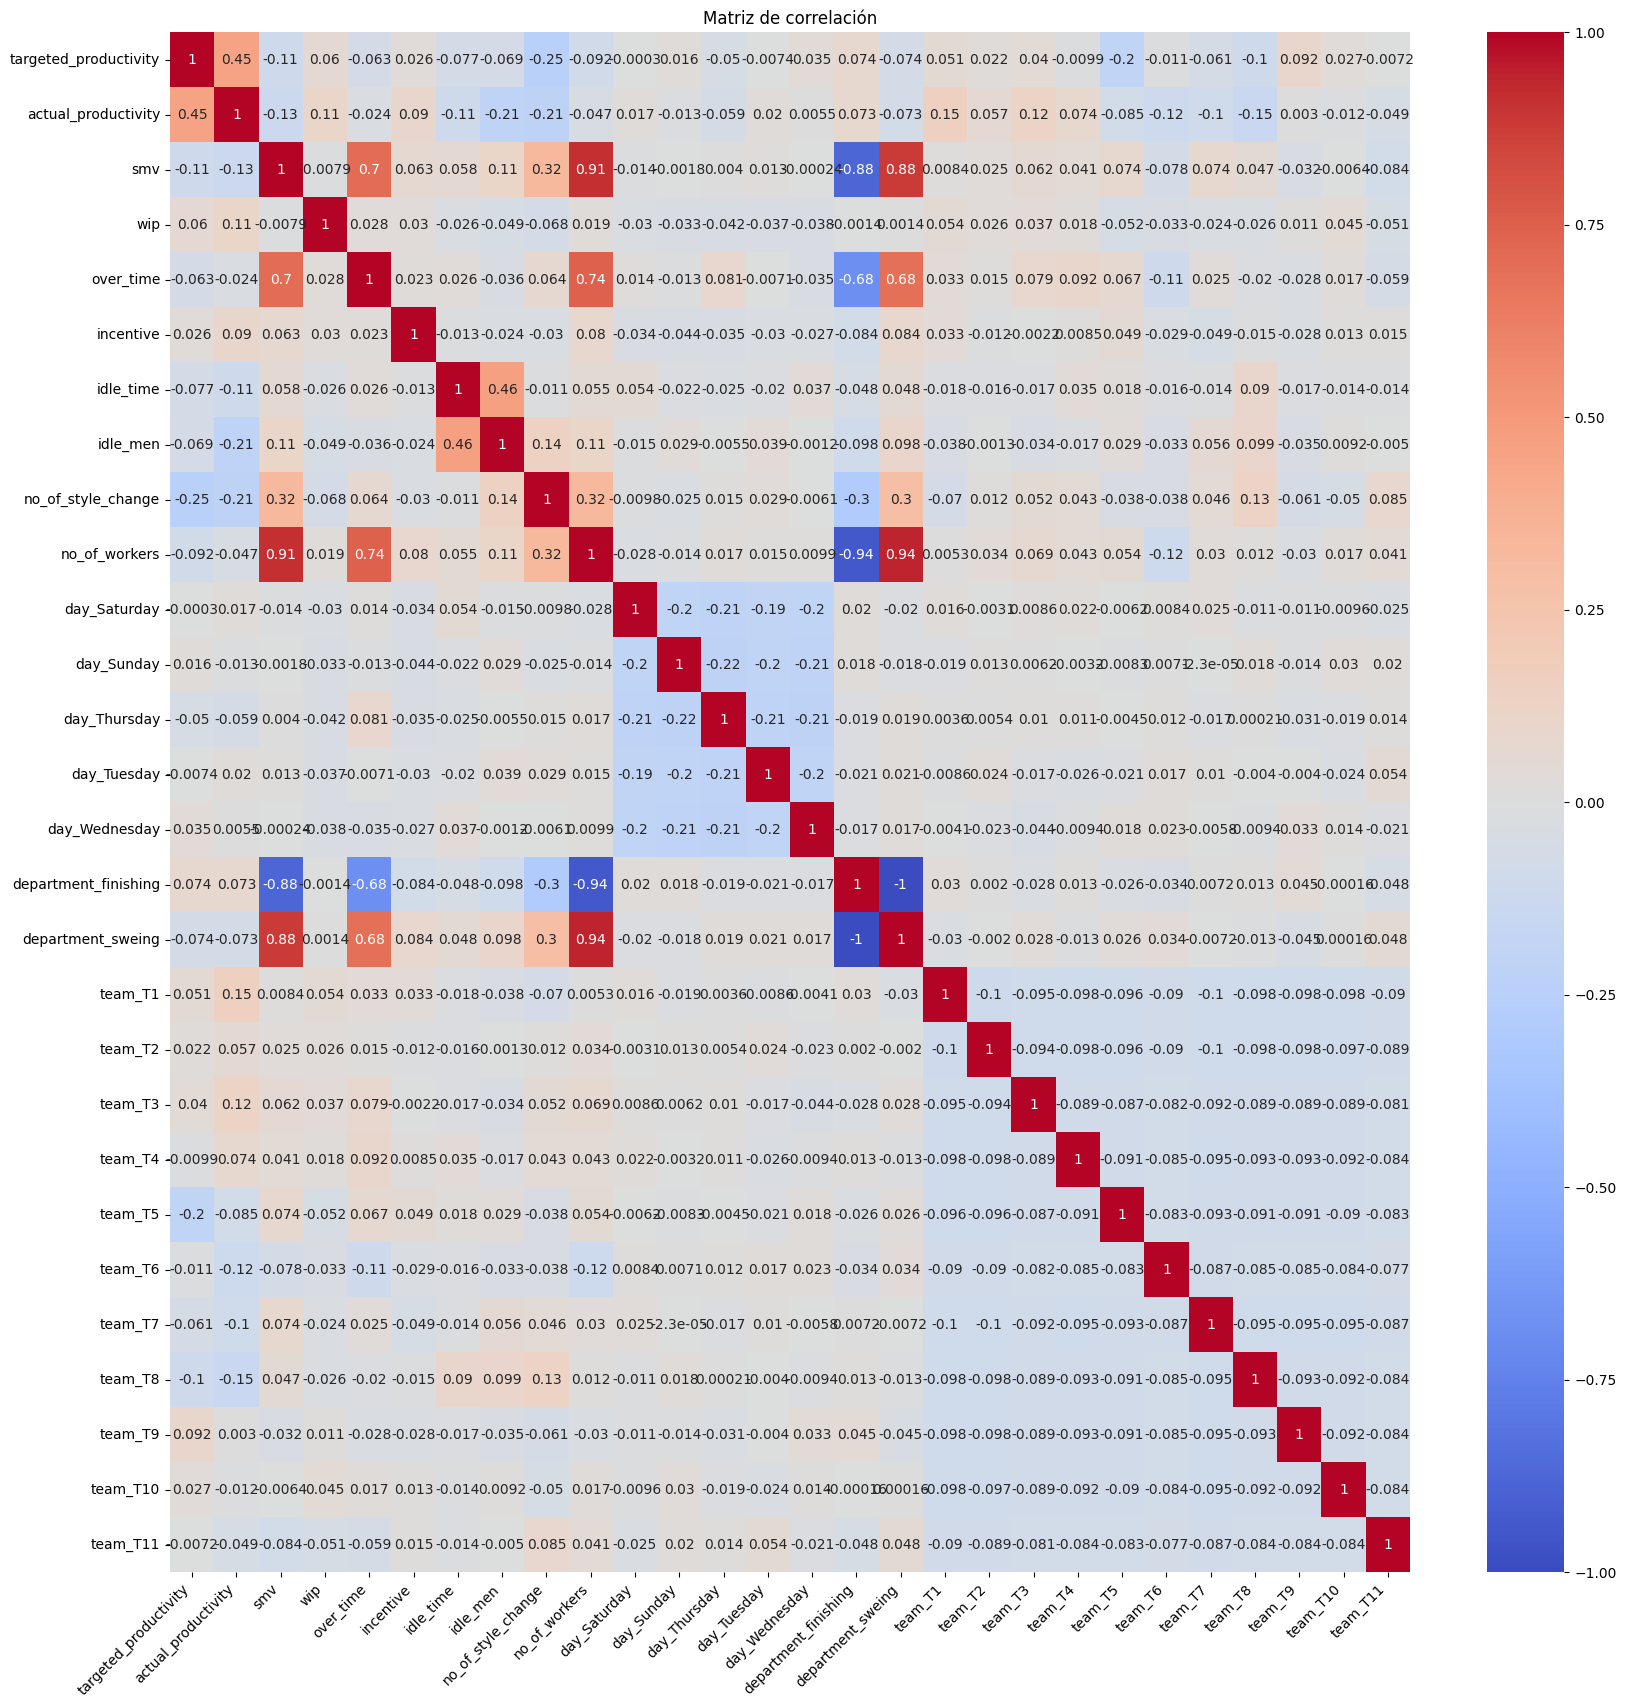

In [16]:
import matplotlib.pyplot as plt
import seaborn as sb
X_train_filtered = X_train[features]
corr= X_train_filtered.corr()
plt.figure(figsize=(20, 20)) 
sb.heatmap(corr, cmap='coolwarm', annot=True, xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.title('Matriz de correlación')
plt.xticks(rotation=45, ha="right") 
plt.show()

Las variables con correlaciones mayores a 0.6 y menores a 0.6 son: 
number of workers-smv
number of workers-over_time
over_time-smv 

department_finishing-over_time
department_finishing-smv
department_finishing-no_of_workers
En ese orden

In [17]:
from sklearn.linear_model import LinearRegression
#objeto del modelo
linreg=LinearRegression()

#ajustar los parámetros del modelo usanod los datos de entrenamiento
linreg.fit(X_train,y_train)

#Coeficientes
print(linreg.intercept_)
print(linreg.coef_)
list(zip(features, linreg.coef_))

-1.865174681370263e-12
[ 7.49231486e-13  1.00000000e+00  6.81542218e-14 -5.61309178e-17
  2.68837230e-17  9.89313786e-17  1.21641655e-16  3.89733191e-16
  3.99586325e-16 -1.22037978e-16 -6.40310477e-17 -5.10503486e-17
 -7.04877278e-17 -8.23283759e-17  2.34216134e-16 -3.37367331e-16
  1.84711666e-16  1.44064719e-15  1.18831269e-15  7.31280813e-16
  1.07002623e-15  7.01533016e-16  3.60761497e-16  6.79103583e-16
  6.89227321e-16  1.06066143e-15  6.70822989e-16  2.18144865e-16]


[('targeted_productivity', 7.49231486245227e-13),
 ('actual_productivity', 1.0000000000002882),
 ('smv', 6.81542218079602e-14),
 ('wip', -5.613091776471124e-17),
 ('over_time', 2.6883722972274335e-17),
 ('incentive', 9.893137864632563e-17),
 ('idle_time', 1.2164165531112352e-16),
 ('idle_men', 3.897331912014708e-16),
 ('no_of_style_change', 3.995863252854793e-16),
 ('no_of_workers', -1.2203797841581705e-16),
 ('day_Saturday', -6.403104767387946e-17),
 ('day_Sunday', -5.10503485771885e-17),
 ('day_Thursday', -7.048772779595734e-17),
 ('day_Tuesday', -8.232837585143245e-17),
 ('day_Wednesday', 2.342161339091116e-16),
 ('department_finishing', -3.3736733143620947e-16),
 ('department_sweing', 1.8471166555025044e-16),
 ('team_T1', 1.44064718921727e-15),
 ('team_T2', 1.188312686098425e-15),
 ('team_T3', 7.312808128143167e-16),
 ('team_T4', 1.0700262290802565e-15),
 ('team_T5', 7.015330157067456e-16),
 ('team_T6', 3.6076149663097357e-16),
 ('team_T7', 6.791035832634518e-16),
 ('team_T8', 6.89

In [18]:
from sklearn import metrics
y_pred = linreg.predict(X_train)
import numpy as np
# mean absolute error
MAE = metrics.mean_absolute_error(y_train, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_train, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

print(MAE)
print(MSE)
print(RMSE)

7.314665409977765e-13
6.548106699140849e-25
8.092037258404616e-13


In [19]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print("MSE",mse_scores)

# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print("RMSE", rmse_scores)

# RMSE promedio a través de todos los grupos
print("RMSE mean",rmse_scores.mean())

MSE [7.22898154e-26 6.40553576e-26 3.36903781e-25 2.43887369e-26
 2.28131168e-25]
RMSE [2.68867654e-13 2.53091599e-13 5.80434132e-13 1.56168937e-13
 4.77630787e-13]
RMSE mean 3.4723862172881204e-13


In [20]:
features = ["smv", "wip", "over_time", "incentive", "idle_time", "idle_men", "no_of_style_change", "no_of_workers","day_Saturday",
            "day_Sunday","day_Thursday","day_Tuesday","day_Wednesday", "department_finishing","team_T1","team_T2","team_T3","team_T4","team_T5",
            "team_T6","team_T7","team_T8","team_T9","team_T10","team_T11"]
X=data_final[features]

In [21]:

import statsmodels.api as sm

X = data_final[features]
y = data_final["actual_productivity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados 
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.218
Model:                             OLS   Adj. R-squared:                  0.195
Method:                  Least Squares   F-statistic:                     9.688
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):           2.00e-32
Time:                         22:23:18   Log-Likelihood:                 419.26
No. Observations:                  897   AIC:                            -786.5
Df Residuals:                      871   BIC:                            -661.7
Df Model:                           25                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

Al hacer este modelo vemos que puede haber problemas de multicolinealidad por lo que calculamos el VIF de las variables independientes

In [22]:
##Calculo del VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# the independent variables set 
X = sm.add_constant(X)
pd.Series([variance_inflation_factor(X, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                   74.982202
smv                      7.038015
wip                      1.056471
over_time                2.591387
incentive                1.046982
idle_time                1.496710
idle_men                 1.556720
no_of_style_change       1.297500
no_of_workers           21.097786
day_Saturday             1.713706
day_Sunday               1.753147
day_Thursday             1.754670
day_Tuesday              1.741207
day_Wednesday            1.763204
department_finishing    15.497546
team_T1                  2.377448
team_T2                  2.426338
team_T3                  2.354727
team_T4                  2.538643
team_T5                  2.281629
team_T6                  1.803024
team_T7                  2.335716
team_T8                  2.419553
team_T9                  2.306065
team_T10                 2.230225
team_T11                 2.154951
dtype: float64

También se realiza la prueba de Durbin Watson para verificar si hay autocorrelación en los datos

In [24]:
from statsmodels. stats. stattools import durbin_watson
# 1. Calcular los residuos
residuals = model.resid

# 2. Calcular el estadístico de Durbin-Watson
durbin_watson_statistic = sm.stats.durbin_watson(residuals)
print("El estadistico de prueba es:", durbin_watson_statistic)

El estadistico de prueba es: 1.957777305114805


Como el estadistico de prueba es cercano a 2, no se rechaza la hipotesis nula y se concluye que los datos no tienen problemas de autocorrelación.

## Resolución de problemas

Eliminar variable de number of workers porque tiene el VIF más alto

In [25]:
import statsmodels.api as sm
features_sinworkers =  ["smv", "wip", "over_time", "incentive", "idle_time", "idle_men", "no_of_style_change","day_Saturday",
            "day_Sunday","day_Thursday","day_Tuesday","day_Wednesday", "department_finishing","team_T1","team_T2","team_T3","team_T4","team_T5",
            "team_T6","team_T7","team_T8","team_T9","team_T10","team_T11"]
X2 = data_final[features_sinworkers]
y= data_final["actual_productivity"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, random_state=1)

# agregar constante explíticamente
X_train2 = sm.add_constant(X_train2)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model2 = sm.OLS(y_train2, X_train2).fit()

# resumen de resultados 
print(model2.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.196
Model:                             OLS   Adj. R-squared:                  0.174
Method:                  Least Squares   F-statistic:                     8.851
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):           2.98e-28
Time:                         22:25:51   Log-Likelihood:                 406.99
No. Observations:                  897   AIC:                            -764.0
Df Residuals:                      872   BIC:                            -644.0
Df Model:                           24                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

Al volver a calcular el VIF de las variables se observa que ya no hay valores mayores a 10

In [26]:
import statsmodels.api as sm
X2 = sm.add_constant(X2)
pd.Series([variance_inflation_factor(X2.values, i) 
               for i in range(X2.shape[1])], 
              index=X2.columns)

const                   39.829975
smv                      5.956800
wip                      1.053938
over_time                2.360818
incentive                1.045264
idle_time                1.496690
idle_men                 1.553978
no_of_style_change       1.279460
day_Saturday             1.712076
day_Sunday               1.752626
day_Thursday             1.754125
day_Tuesday              1.741118
day_Wednesday            1.762874
department_finishing     6.225650
team_T1                  2.058453
team_T2                  2.070605
team_T3                  2.028424
team_T4                  2.154013
team_T5                  1.999543
team_T6                  1.802572
team_T7                  2.070087
team_T8                  2.163835
team_T9                  2.022015
team_T10                 1.964095
team_T11                 1.794974
dtype: float64

Se realiza un nuevo en donde se eliminan las variables no significativas del modelo anterior

In [27]:
import statsmodels.api as sm
features = ["smv", "incentive", "idle_men", "no_of_style_change", "department_finishing","team_T1","team_T3",
            "team_T6","team_T8","team_T11"]
X2 = data_final[features]
y= data_final["actual_productivity"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, random_state=1)
# agregar constante explíticamente
X_train2 = sm.add_constant(X_train2)

# Ajustar modelo con regresión robusta
model3 = sm.OLS(y_train2, X_train2).fit()
print(model3.summary())


                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.167
Model:                             OLS   Adj. R-squared:                  0.157
Method:                  Least Squares   F-statistic:                     17.73
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):           1.06e-29
Time:                         22:25:59   Log-Likelihood:                 391.03
No. Observations:                  897   AIC:                            -760.1
Df Residuals:                      886   BIC:                            -707.3
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

Finalmente se eliminan las variables de Team

In [28]:
import statsmodels.api as sm
features = ["smv", "incentive", "idle_men", "no_of_style_change", "department_finishing"]
X = data_final[features]
y= data_final["actual_productivity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# Ajustar modelo con regresión robusta
model4 = sm.OLS(y_train, X_train).fit()
print(model4.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.096
Model:                             OLS   Adj. R-squared:                  0.091
Method:                  Least Squares   F-statistic:                     18.86
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):           7.44e-18
Time:                         22:26:02   Log-Likelihood:                 354.33
No. Observations:                  897   AIC:                            -696.7
Df Residuals:                      891   BIC:                            -667.9
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

## Validación del modelo final

In [29]:
from statsmodels. stats. stattools import durbin_watson
# 1. Calcular los residuos
residuals = model4.resid

# 2. Calcular el estadístico de Durbin-Watson
durbin_watson_statistic = sm.stats.durbin_watson(residuals)
print("El estadistico de prueba es:", durbin_watson_statistic)

El estadistico de prueba es: 1.957843394390792


In [30]:
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
residuals_squared = model4.resid**2

bp_model = sm.OLS(residuals_squared, sm.add_constant(X_train)).fit()

bp_test_statistic = bp_model.rsquared
bp_p_value = bp_model.f_pvalue

print("El estadistico de prueba es:", bp_test_statistic)
print("P-value:", bp_p_value)

El estadistico de prueba es: 0.051235965926427096
P-value: 5.841608081333887e-09


In [31]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

fitted_values = model4.fittedvalues

# Calcular el cuadrado de los valores ajustados
fitted_values_squared = fitted_values**2

# Agregar los cuadrados de los valores ajustados al modelo existente
model_reset = sm.OLS(y_train, sm.add_constant(pd.concat([X_train, fitted_values_squared], axis=1))).fit()

# Realizar la prueba de Ramsey RESET
reset_test = sm.stats.diagnostic.linear_reset(model_reset)

# Imprimir los resultados de la prueba
print("Ramsey RESET Test:")
print(reset_test)

Ramsey RESET Test:
<Wald test (chi2): statistic=48.053210260406146, p-value=3.6760209100223124e-11, df_denom=2>
